# Week 6 - Decision Trees on Real Data

We'll briefly look at Machine Learning (ML), and how you can apply it to archaeological, tabular data. In the first section we will use a spearheads data set, and try to predict whether a spearhead is bronze or iron, based on the other properties of the spearhead. This might not be a very useful application of Machine Learning, but it's just to show you what ML looks like in Python, and how easy it is to train your own model. At the end of the module, you'll try and train your own model to predict pottery types.


## Spearheads material prediction

We need to import some libraries!

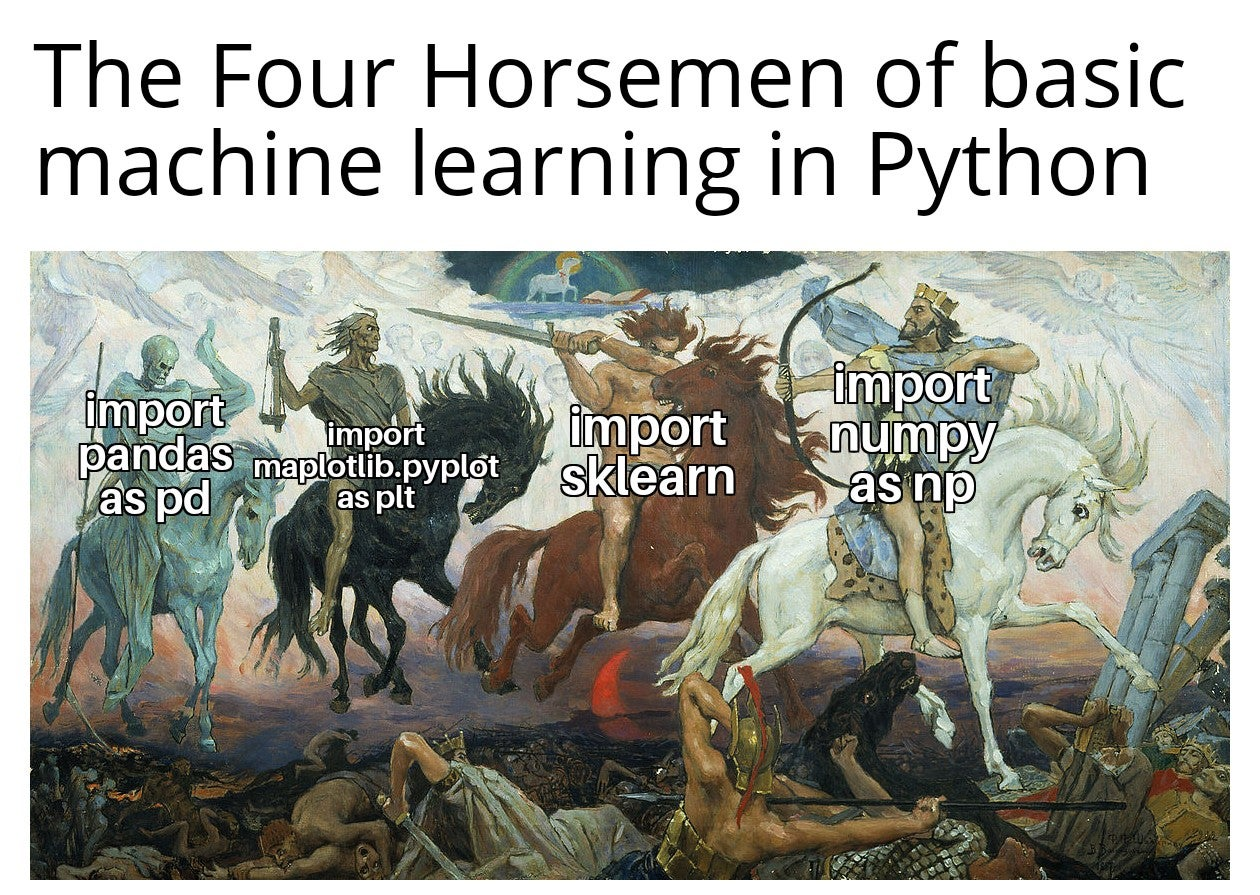

Don't worry about understanding everything being imported here.

In [101]:
# import required libraries
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn import svm
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import RandomForestClassifier
import numpy as np
import seaborn as sns

Now let's import the spearheads CSV and inspect the data

In [21]:
%pip install openpyxl


   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpy


[notice] A new release of pip is available: 25.1.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [145]:
# load site data
df_raw = pd.read_excel('./wanyika-chronological-database-in-excel-format.xlsx')

# have a quick look at the data 
df_raw.head()

Entry ID  Site ID Site Name  Country Country Region  \
0         1        1  Kabusanze  Rwanda         Rwanda   
1         2        1  Kabusanze  Rwanda         Rwanda   
2         3        1  Kabusanze  Rwanda         Rwanda   
3         4        2  Masangano  Rwanda         Rwanda   
4         5        3     Karama  Rwanda         Rwanda   

              Vegetation Cover    Latitude  Longitude Trench/Site Notes   \
0  Forest/wood/grassland mosaic  -2.659455  29.620696              BPS36   
1  Forest/wood/grassland mosaic  -2.659455  29.620696              BPS36   
2  Forest/wood/grassland mosaic  -2.659455  29.620696              BPS36   
3  Forest/wood/grassland mosaic  -1.687612  29.881758                MSG   
4  Forest/wood/grassland mosaic  -1.929041  29.841008             GPS014   

              Context  ...                                        Reference 1  \
0            Pit fill  ...  Giblin, J., & Fuller, D. (2011). First and sec...   
1         Burial fill  ...  Giblin, J., & Fuller, D. (2011). First and sec...   
2            Pit fill  ...  Giblin, J., & Fuller, D. (2011). First and sec...   
3  Occupation deposit  ...  Giblin, J., & Fuller, D. (2011). First and sec...   
4            Pit fill  ...  Giblin, J., & Fuller, D. (2011). First and sec...   

                 DOI Reference 1  \
0  DOI:10.1007/s00334-011-0288-0   
1  DOI:10.1007/s00334-011-0288-0   
2  DOI:10.1007/s00334-011-0288-0   
3  DOI:10.1007/s00334-011-0288-0   
4  DOI:10.1007/s00334-011-0288-0   

                                         Reference 2  \
0  Giblin, J. D. (2008). New Work on the Later Ar...   
1  Giblin, J. D. (2008). New Work on the Later Ar...   
2  Giblin, J. D. (2008). New Work on the Later Ar...   
3  Giblin, J. D. (2008). New Work on the Later Ar...   
4  Giblin, J. D. (2008). New Work on the Later Ar...   

                                     DOI Reference 2  \
0  https://www.academia.edu/813429/New_work_on_th...   
1  https://www.academia.edu/813429/New_work_on_th...   
2  https://www.academia.edu/813429/New_work_on_th...   
3  https://www.academia.edu/813429/New_work_on_th...   
4  https://www.academia.edu/813429/New_work_on_th...   

                                         Reference 3  \
0  Giblin, J., & Humphris, J. (2010). An Urewe bu...   
1  Giblin, J., & Humphris, J. (2010). An Urewe bu...   
2  Giblin, J., & Humphris, J. (2010). An Urewe bu...   
3                                                NaN   
4                                                NaN   

                                DOI Reference 3  Reference 4  DOI Reference 4  \
0  https://doi.org/10.1080/0067270X.2010.521677          NaN              NaN   
1  https://doi.org/10.1080/0067270X.2010.521678          NaN              NaN   
2  https://doi.org/10.1080/0067270X.2010.521679          NaN              NaN   
3                                           NaN          NaN              NaN   
4                                           NaN          NaN              NaN   

                                         Reference 5  \
0  Giblin, J. D. (2010). Re-constructing the past...   
1  Giblin, J. D. (2010). Re-constructing the past...   
2  Giblin, J. D. (2010). Re-constructing the past...   
3  Giblin, J. D. (2010). Re-constructing the past...   
4  Giblin, J. D. (2010). Re-constructing the past...   

                                DOI Reference 5  
0  https://doi.org/10.1080/0067270X.2010.521680  
1  https://doi.org/10.1080/0067270X.2010.521680  
2  https://doi.org/10.1080/0067270X.2010.521680  
3  https://doi.org/10.1080/0067270X.2010.521680  
4  https://doi.org/10.1080/0067270X.2010.521680  

[5 rows x 75 columns]

In [146]:
from collections import Counter
Counter(df_raw['Country'])

Counter({'Madagascar': 677,
         'Kenya': 668,
         'Tanzania': 389,
         'Comoros': 26,
         'Rwanda': 20,
         'Tanzania ': 12})

In [28]:
# Let's see our columns
columns = df_raw.columns
for i in range(len(columns)):
    print(str(i) + ' ' + columns[i])

0 Entry ID
1 Site ID
2 Site Name 
3 Country
4 Country Region
5 Vegetation Cover  
6 Latitude
7 Longitude
8 Trench/Site Notes 
9 Context
10 Date Type
11 Labcode
12 Date BP
13 Date BP SD
14 Min Chronology (Calibrated BCE/CE) 
15 Max Chronology  (Calibrated BCE/CE)
16 Mean Chronology  (Calibrated BCE/CE) 
17 Min Chronology (Calibrated BP - 1950)
18 Max Chronology  (Calibrated BP - 1950)
19 Mean Chronology  (Calibrated BP - 1950) 
20 Dated Material
21 Dated Taxon
22 Indet Millet
23 Finger Millet (Eleusine coracana)
24 Pearl Millet (Pennisetum glaucum)
25 Sorghum (Sorghum bicolor)
26 Lablab (Lablab purpureus)
27 Vigna sp.
28 Mung Bean (Vigna radiata)
29 Cowpea (Vigna unguiculata)
30 Rice (Oryza sativa)
31 Peas (Pisum)
32 Triticoid
33 Wheat (Triticum sp.) 
34 Legumes Beans?
35 Red Dates (Ziziphus jujuba)
36 Indet. Nuts
37 Coconuts (Cocos nucifera)
38 Fig (Ficus sp.) 
39 Baobab (Adansonia digitata)
40 Cotton (Gossypium sp.)
41 Other
42 Wild Terrestrial Fauna 
43 Avian Fauna 
44 Aquatic Fauna


In [31]:
df_raw = df_raw.drop(columns = [columns[i] for i in [0,1,2,4,6,7,8,9,10,11,12,13,14,15,16,17,18,20,21,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74]])

In [32]:
# Let's look at the unique items for the columns

for column in df_raw.columns:
    print('-------')
    print(column)
    print("Set size: " + str(len(df_raw[column].unique())))
    print(df_raw[column].unique())

-------
Country
Set size: 6
['Rwanda' 'Kenya' 'Tanzania' 'Tanzania ' 'Comoros' 'Madagascar']
-------
Vegetation Cover  
Set size: 6
['Forest/wood/grassland mosaic ' 'Coastal forest mosaic '
 'Dry northern wooded grassland' 'Montane forest'
 'Dry southern wooded grassland ' 'Dry coastal wooded grassland']
-------
Mean Chronology  (Calibrated BP - 1950) 
Set size: 1457
[1470.  1475.5 1562.5 ...  595.   607.5  607. ]
-------
Indet Millet
Set size: 2
[nan 'Yes']
-------
Finger Millet (Eleusine coracana)
Set size: 2
[nan 'Yes']
-------
Pearl Millet (Pennisetum glaucum)
Set size: 2
['Yes' nan]
-------
Sorghum (Sorghum bicolor)
Set size: 2
['Yes' nan]
-------
Lablab (Lablab purpureus)
Set size: 2
[nan 'Yes']
-------
Vigna sp.
Set size: 2
['Yes' nan]
-------
Mung Bean (Vigna radiata)
Set size: 2
[nan 'Yes']
-------
Cowpea (Vigna unguiculata)
Set size: 2
['Yes' nan]
-------
Rice (Oryza sativa)
Set size: 3
[nan 'Yes' 'Yes ']
-------
Peas (Pisum)
Set size: 2
[nan 'Yes']
-------
Triticoid
Set size

In [33]:
# Let's check what percentage of the columns are empty (NaN values) using the "isna" method

length = len(df_raw)

for column in df_raw.columns:
    percent_NaN = df_raw[column].isna().sum()/length*100
    print('-------')
    print(column)
    print(percent_NaN)

-------
Country
0.0
-------
Vegetation Cover  
0.0
-------
Mean Chronology  (Calibrated BP - 1950) 
0.0
-------
Indet Millet
99.83258928571429
-------
Finger Millet (Eleusine coracana)
97.82366071428571
-------
Pearl Millet (Pennisetum glaucum)
99.38616071428571
-------
Sorghum (Sorghum bicolor)
98.10267857142857
-------
Lablab (Lablab purpureus)
99.83258928571429
-------
Vigna sp.
99.72098214285714
-------
Mung Bean (Vigna radiata)
99.72098214285714
-------
Cowpea (Vigna unguiculata)
99.33035714285714
-------
Rice (Oryza sativa)
98.93973214285714
-------
Peas (Pisum)
99.77678571428571
-------
Triticoid
100.0
-------
Wheat (Triticum sp.) 
99.94419642857143
-------
Legumes Beans?
99.94419642857143
-------
Red Dates (Ziziphus jujuba)
99.94419642857143
-------
Indet. Nuts
99.49776785714286
-------
Coconuts (Cocos nucifera)
99.44196428571429
-------
Fig (Ficus sp.) 
99.94419642857143
-------
Baobab (Adansonia digitata)
99.27455357142857
-------
Cotton (Gossypium sp.)
99.609375
-------
Othe

In [67]:
# Source - https://stackoverflow.com/a
# Posted by Adam Owczarczyk
# Retrieved 2025-12-06, License - CC BY-SA 3.0

df_raw = df_raw.apply(lambda x: x.str.replace(' ','').str.replace('?','').str.lower() if x.dtype == "object" else x)


In [68]:
for column in df_raw.columns:
    print('-------')
    print(column)
    print("Set size: " + str(len(df_raw[column].unique())))
    print(df_raw[column].unique())

-------
Country
Set size: 5
['rwanda' 'kenya' 'tanzania' 'comoros' 'madagascar']
-------
Vegetation Cover  
Set size: 6
['forest/wood/grasslandmosaic' 'coastalforestmosaic'
 'drynorthernwoodedgrassland' 'montaneforest' 'drysouthernwoodedgrassland'
 'drycoastalwoodedgrassland']
-------
Mean Chronology  (Calibrated BP - 1950) 
Set size: 1457
[1470.  1475.5 1562.5 ...  595.   607.5  607. ]
-------
Indet Millet
Set size: 2
[nan 'yes']
-------
Finger Millet (Eleusine coracana)
Set size: 2
[nan 'yes']
-------
Pearl Millet (Pennisetum glaucum)
Set size: 2
['yes' nan]
-------
Sorghum (Sorghum bicolor)
Set size: 2
['yes' nan]
-------
Lablab (Lablab purpureus)
Set size: 2
[nan 'yes']
-------
Vigna sp.
Set size: 2
['yes' nan]
-------
Mung Bean (Vigna radiata)
Set size: 2
[nan 'yes']
-------
Cowpea (Vigna unguiculata)
Set size: 2
['yes' nan]
-------
Rice (Oryza sativa)
Set size: 2
[nan 'yes']
-------
Peas (Pisum)
Set size: 2
[nan 'yes']
-------
Triticoid
Set size: 1
[nan]
-------
Wheat (Triticum s

In [ ]:
df_raw = df_raw.drop(columns=['Triticoid','Ceramic Phase (Pottery Ware)','Other'])

In [74]:
df_raw = df_raw.fillna(0).replace('yes',1)

C:\Users\re72fam\AppData\Local\Temp\ipykernel_33788\1251218478.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_raw = df_raw.fillna(0).replace('yes',1)


In [84]:
df_raw.keys()

Index(['Country', 'Vegetation Cover  ',
       'Mean Chronology  (Calibrated BP - 1950) ', 'Indet Millet',
       'Finger Millet (Eleusine coracana)',
       'Pearl Millet (Pennisetum glaucum)', 'Sorghum (Sorghum bicolor)',
       'Lablab (Lablab purpureus)', 'Vigna sp.', 'Mung Bean (Vigna radiata)',
       'Cowpea (Vigna unguiculata)', 'Rice (Oryza sativa)', 'Peas (Pisum)',
       'Wheat (Triticum sp.) ', 'Legumes Beans?',
       'Red Dates (Ziziphus jujuba)', 'Indet. Nuts',
       'Coconuts (Cocos nucifera)', 'Fig (Ficus sp.) ',
       'Baobab (Adansonia digitata)', 'Cotton (Gossypium sp.)',
       'Wild Terrestrial Fauna ', 'Avian Fauna ', 'Aquatic Fauna',
       'Indet. Bones', 'Bovids', 'Cattle (Bos taurus/indicus)',
       'Sheep (Ovis aries)', 'Goat (Capra hircus)',
       'Sheep/Goat (Ovis/Capra Indet.)', 'Camel (Camelus dromedarius)',
       'Donkey (Equus asinus)', 'Chicken (Gallus gallus)', 'Iron Smelting',
       'Iron Use', 'Ceramics'],
      dtype='object')

In [85]:
df_raw = pd.get_dummies(df_raw, columns=['Vegetation Cover  '], dtype=int)

In [86]:
df_raw.head()

Country  Mean Chronology  (Calibrated BP - 1950)   Indet Millet  \
0  rwanda                                    1470.0             0   
1  rwanda                                    1475.5             0   
2  rwanda                                    1562.5             0   
3  rwanda                                    1608.5             0   
4  rwanda                                    1193.5             0   

   Finger Millet (Eleusine coracana)  Pearl Millet (Pennisetum glaucum)  \
0                                  0                                  1   
1                                  0                                  0   
2                                  0                                  1   
3                                  0                                  0   
4                                  1                                  0   

   Sorghum (Sorghum bicolor)  Lablab (Lablab purpureus)  Vigna sp.  \
0                          1                          0          1   
1                          0                          0          0   
2                          1                          0          1   
3                          0                          0          0   
4                          0                          0          0   

   Mung Bean (Vigna radiata)  Cowpea (Vigna unguiculata)  ...  \
0                          0                           1  ...   
1                          0                           0  ...   
2                          0                           1  ...   
3                          0                           0  ...   
4                          0                           0  ...   

   Chicken (Gallus gallus)  Iron Smelting  Iron Use  Ceramics  \
0                        0              0         0         1   
1                        0              0         1         1   
2                        0              0         0         1   
3                        0              0         0         1   
4                        0              0         0         1   

   Vegetation Cover  _coastalforestmosaic  \
0                                       0   
1                                       0   
2                                       0   
3                                       0   
4                                       0   

   Vegetation Cover  _drycoastalwoodedgrassland  \
0                                             0   
1                                             0   
2                                             0   
3                                             0   
4                                             0   

   Vegetation Cover  _drynorthernwoodedgrassland  \
0                                              0   
1                                              0   
2                                              0   
3                                              0   
4                                              0   

   Vegetation Cover  _drysouthernwoodedgrassland  \
0                                              0   
1                                              0   
2                                              0   
3                                              0   
4                                              0   

   Vegetation Cover  _forest/wood/grasslandmosaic  \
0                                               1   
1                                               1   
2                                               1   
3                                               1   
4                                               1   

   Vegetation Cover  _montaneforest  
0                                 0  
1                                 0  
2                                 0  
3                                 0  
4                                 0  

[5 rows x 41 columns]

In [89]:
# set the  (the label we want to predict)
y = df_raw['Country']

# set the X (the features we want the algorithm to learn from)
X = df_raw.drop(columns=['Country'])


In [92]:
df_raw = pd.get_dummies(df_raw, columns=['Country'], dtype=int)

In [93]:
df_raw

Mean Chronology  (Calibrated BP - 1950)   Indet Millet  \
0                                       1470.0             0   
1                                       1475.5             0   
2                                       1562.5             0   
3                                       1608.5             0   
4                                       1193.5             0   
...                                        ...           ...   
1787                                     595.0             0   
1788                                     607.5             0   
1789                                     615.0             0   
1790                                     607.0             0   
1791                                     625.5             0   

      Finger Millet (Eleusine coracana)  Pearl Millet (Pennisetum glaucum)  \
0                                     0                                  1   
1                                     0                                  0   
2                                     0                                  1   
3                                     0                                  0   
4                                     1                                  0   
...                                 ...                                ...   
1787                                  0                                  0   
1788                                  0                                  0   
1789                                  0                                  0   
1790                                  0                                  0   
1791                                  0                                  0   

      Sorghum (Sorghum bicolor)  Lablab (Lablab purpureus)  Vigna sp.  \
0                             1                          0          1   
1                             0                          0          0   
2                             1                          0          1   
3                             0                          0          0   
4                             0                          0          0   
...                         ...                        ...        ...   
1787                          0                          0          0   
1788                          0                          0          0   
1789                          0                          0          0   
1790                          0                          0          0   
1791                          0                          0          0   

      Mung Bean (Vigna radiata)  Cowpea (Vigna unguiculata)  \
0                             0                           1   
1                             0                           0   
2                             0                           1   
3                             0                           0   
4                             0                           0   
...                         ...                         ...   
1787                          0                           0   
1788                          0                           0   
1789                          0                           0   
1790                          0                           0   
1791                          0                           0   

      Rice (Oryza sativa)  ...  Vegetation Cover  _drycoastalwoodedgrassland  \
0                       0  ...                                             0   
1                       0  ...                                             0   
2                       0  ...                                             0   
3                       0  ...                                             0   
4                       0  ...                                             0   
...                   ...  ...                                           ...   
1787                    0  ...                                             0   
1788                    0 

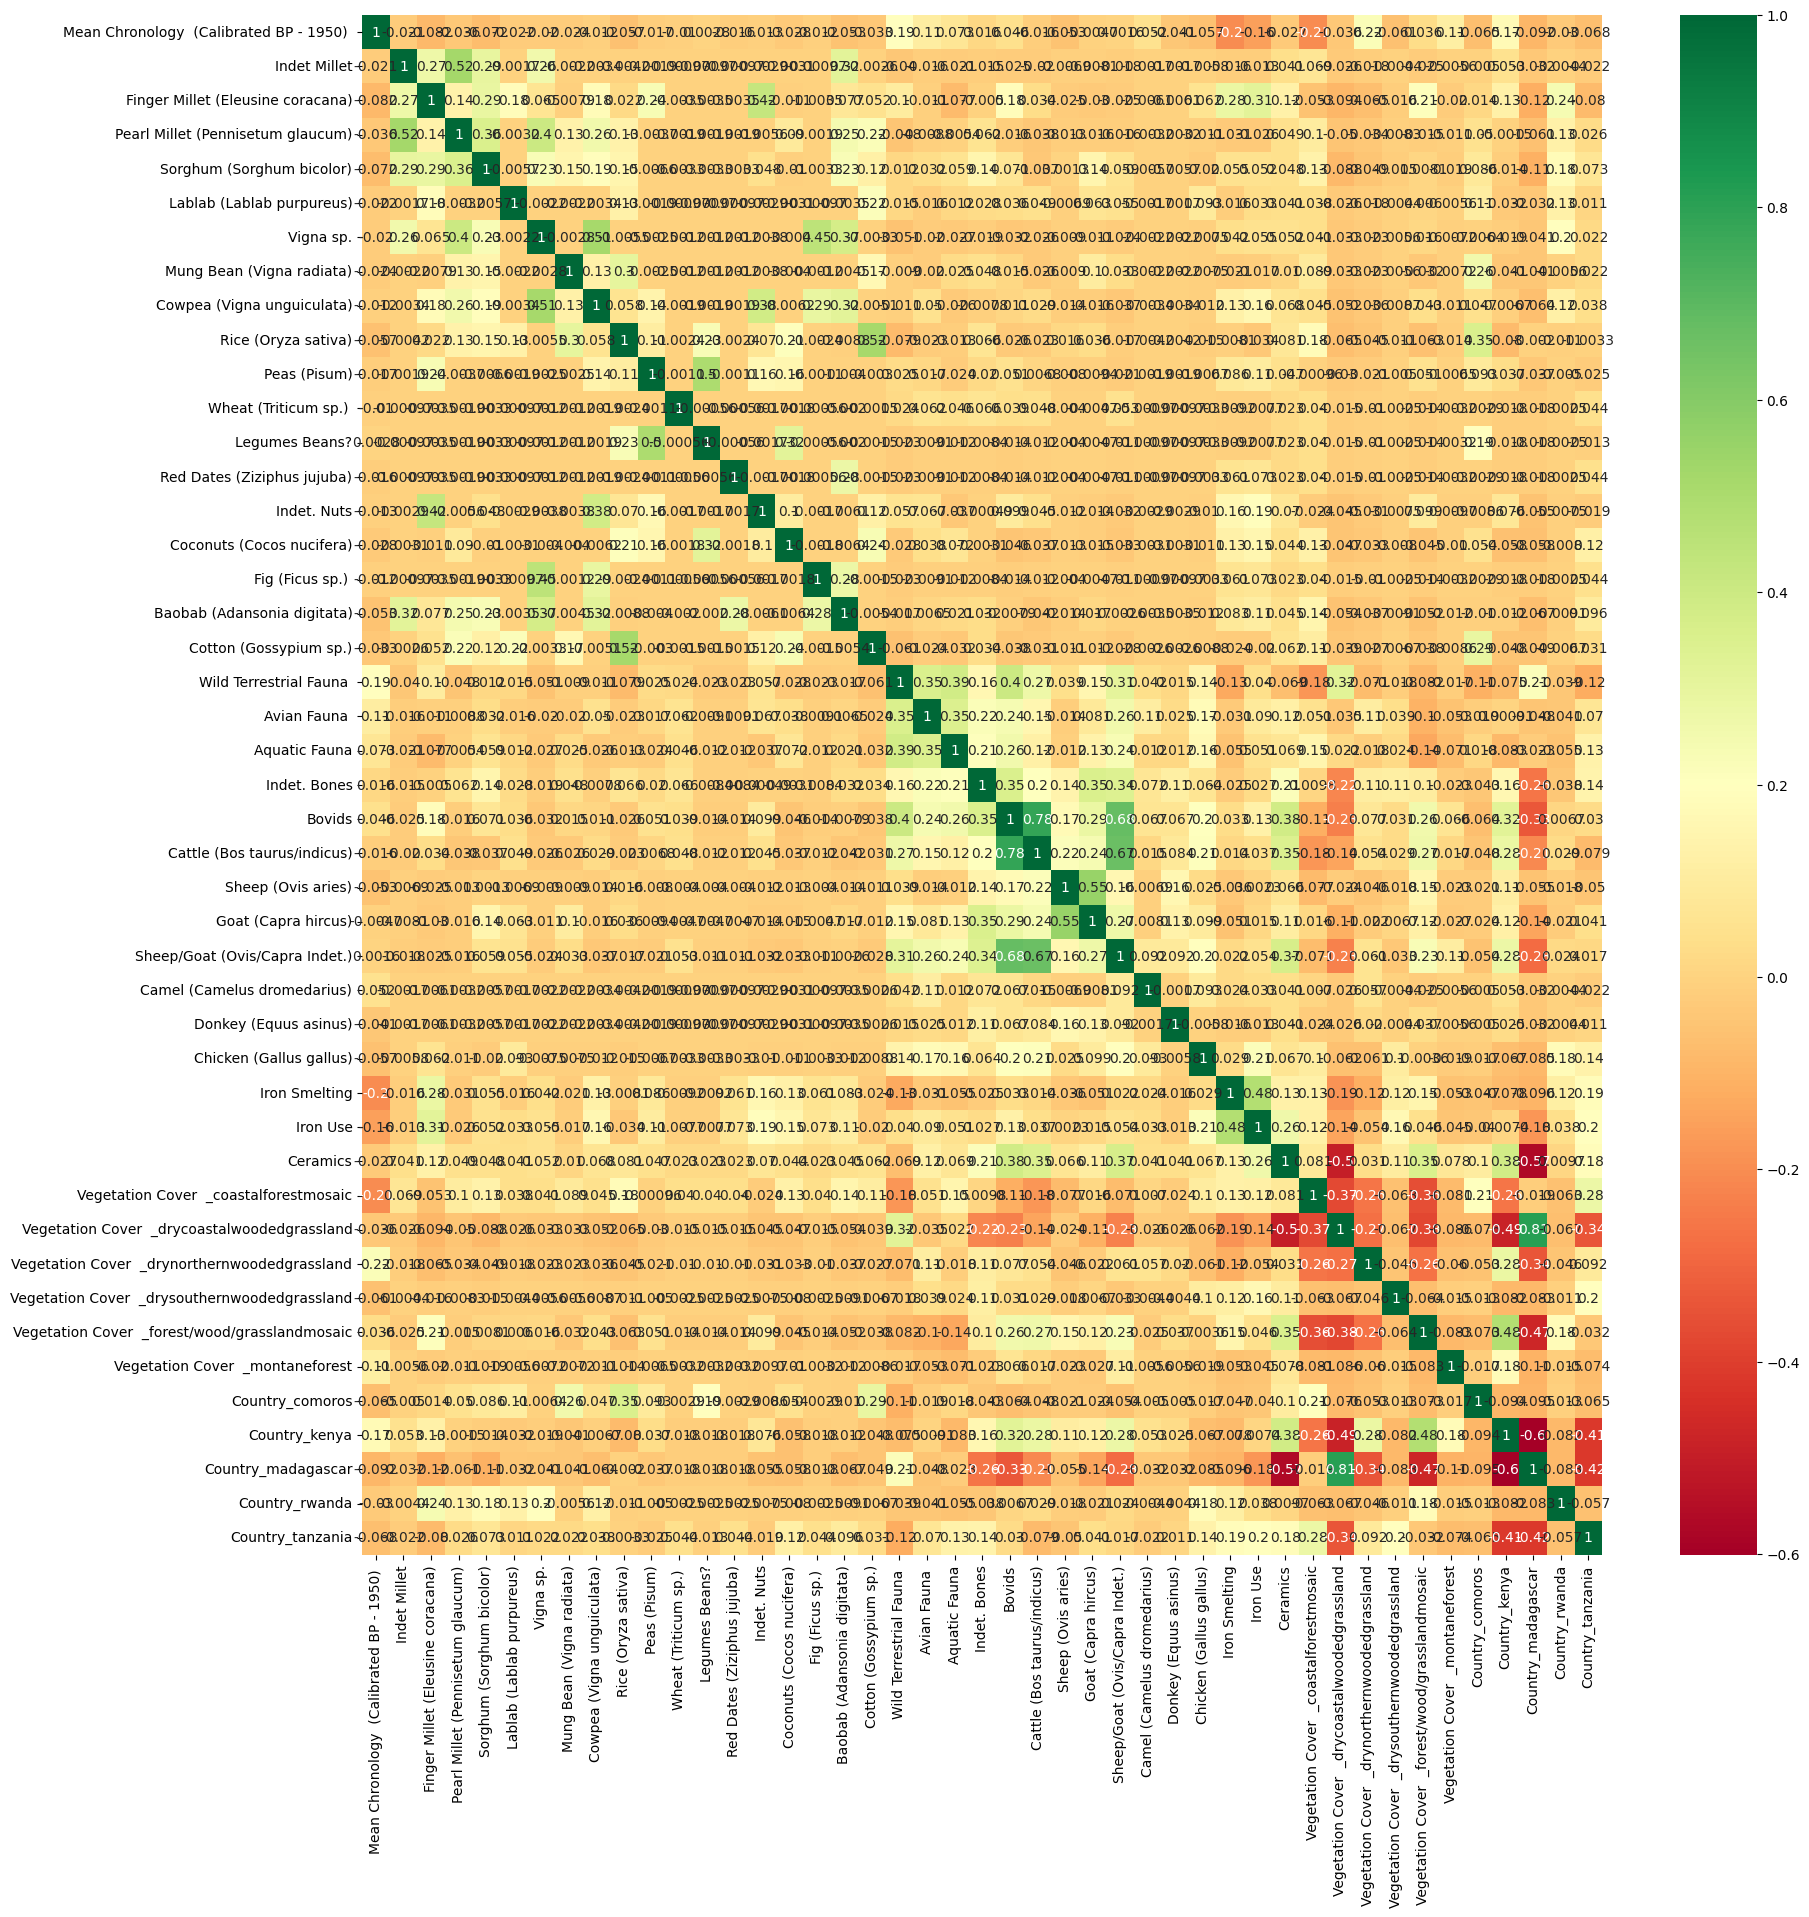

In [96]:
corrmat = df_raw.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))

# Plot heat map
g=sns.heatmap(df_raw[top_corr_features].corr(),annot=True,cmap="RdYlGn")

Now we have defined what to use as labels and features, it is time to make a test/train split in our data. We'll use a built-in function of `sklearn` to do this for us. We set `test_size` to 0.2, meaning that 20% of our data should be used as the test set. Then we inspect what the `X` and `y` look like:

In [ ]:
# use sklearn to automatically make a test/train set from our data, using a 80/20 split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)

## Decision Tree

Now the data is prepared, we need to load a classifier from `sklearn`, and then train that classifier on our data. We'll start with a Decision Tree, which is an easy to understand and inspect model.

In [190]:
# Create Decision Tree classifier object
dt_clf = DecisionTreeClassifier(max_depth=3)

# Train Decision Tree Classifier on our data
dt_clf = dt_clf.fit(X_train,y_train)

# Predict the labels on the test data
y_pred = dt_clf.predict(X_test)

# Show f1
print('accuracy score on test data:')
print(accuracy_score(y_test, y_pred))

accuracy score on test data:
0.7465181058495822


In [153]:
# use sklearn to view full classification report
print('Classification report:')
print(classification_report(y_test,y_pred))


Classification report:
              precision    recall  f1-score   support

     comoros       0.67      0.40      0.50         5
       kenya       0.84      0.91      0.87       134
  madagascar       0.97      0.95      0.96       136
      rwanda       1.00      0.25      0.40         4
    tanzania       0.73      0.70      0.71        80

    accuracy                           0.86       359
   macro avg       0.84      0.64      0.69       359
weighted avg       0.86      0.86      0.86       359



In [191]:
K = range(1,20)
scores = []


for k in K:
    # Create Decision Tree classifier object
    dt_clf = DecisionTreeClassifier(max_depth=k)

    # Train Decision Tree Classifier on our data
    dt_clf = dt_clf.fit(X_train,y_train)

    # Predict the labels on the test data
    y_pred = dt_clf.predict(X_test)

    score = accuracy_score(y_test, y_pred)
    scores.append(score)

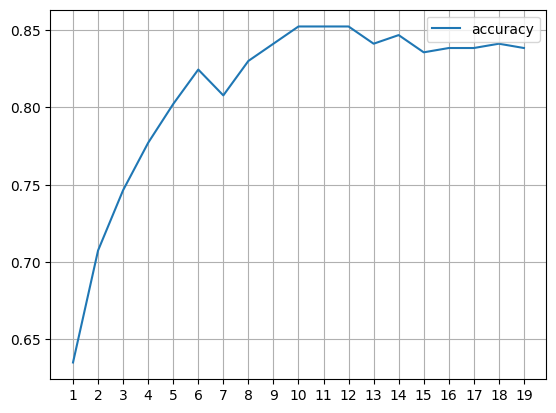

In [192]:
plt.plot(K, scores, label="accuracy")
plt.xticks(ticks=K)
plt.grid()
plt.legend()

In [193]:
# Create Decision Tree classifier object
dt_clf = DecisionTreeClassifier(max_depth=6)

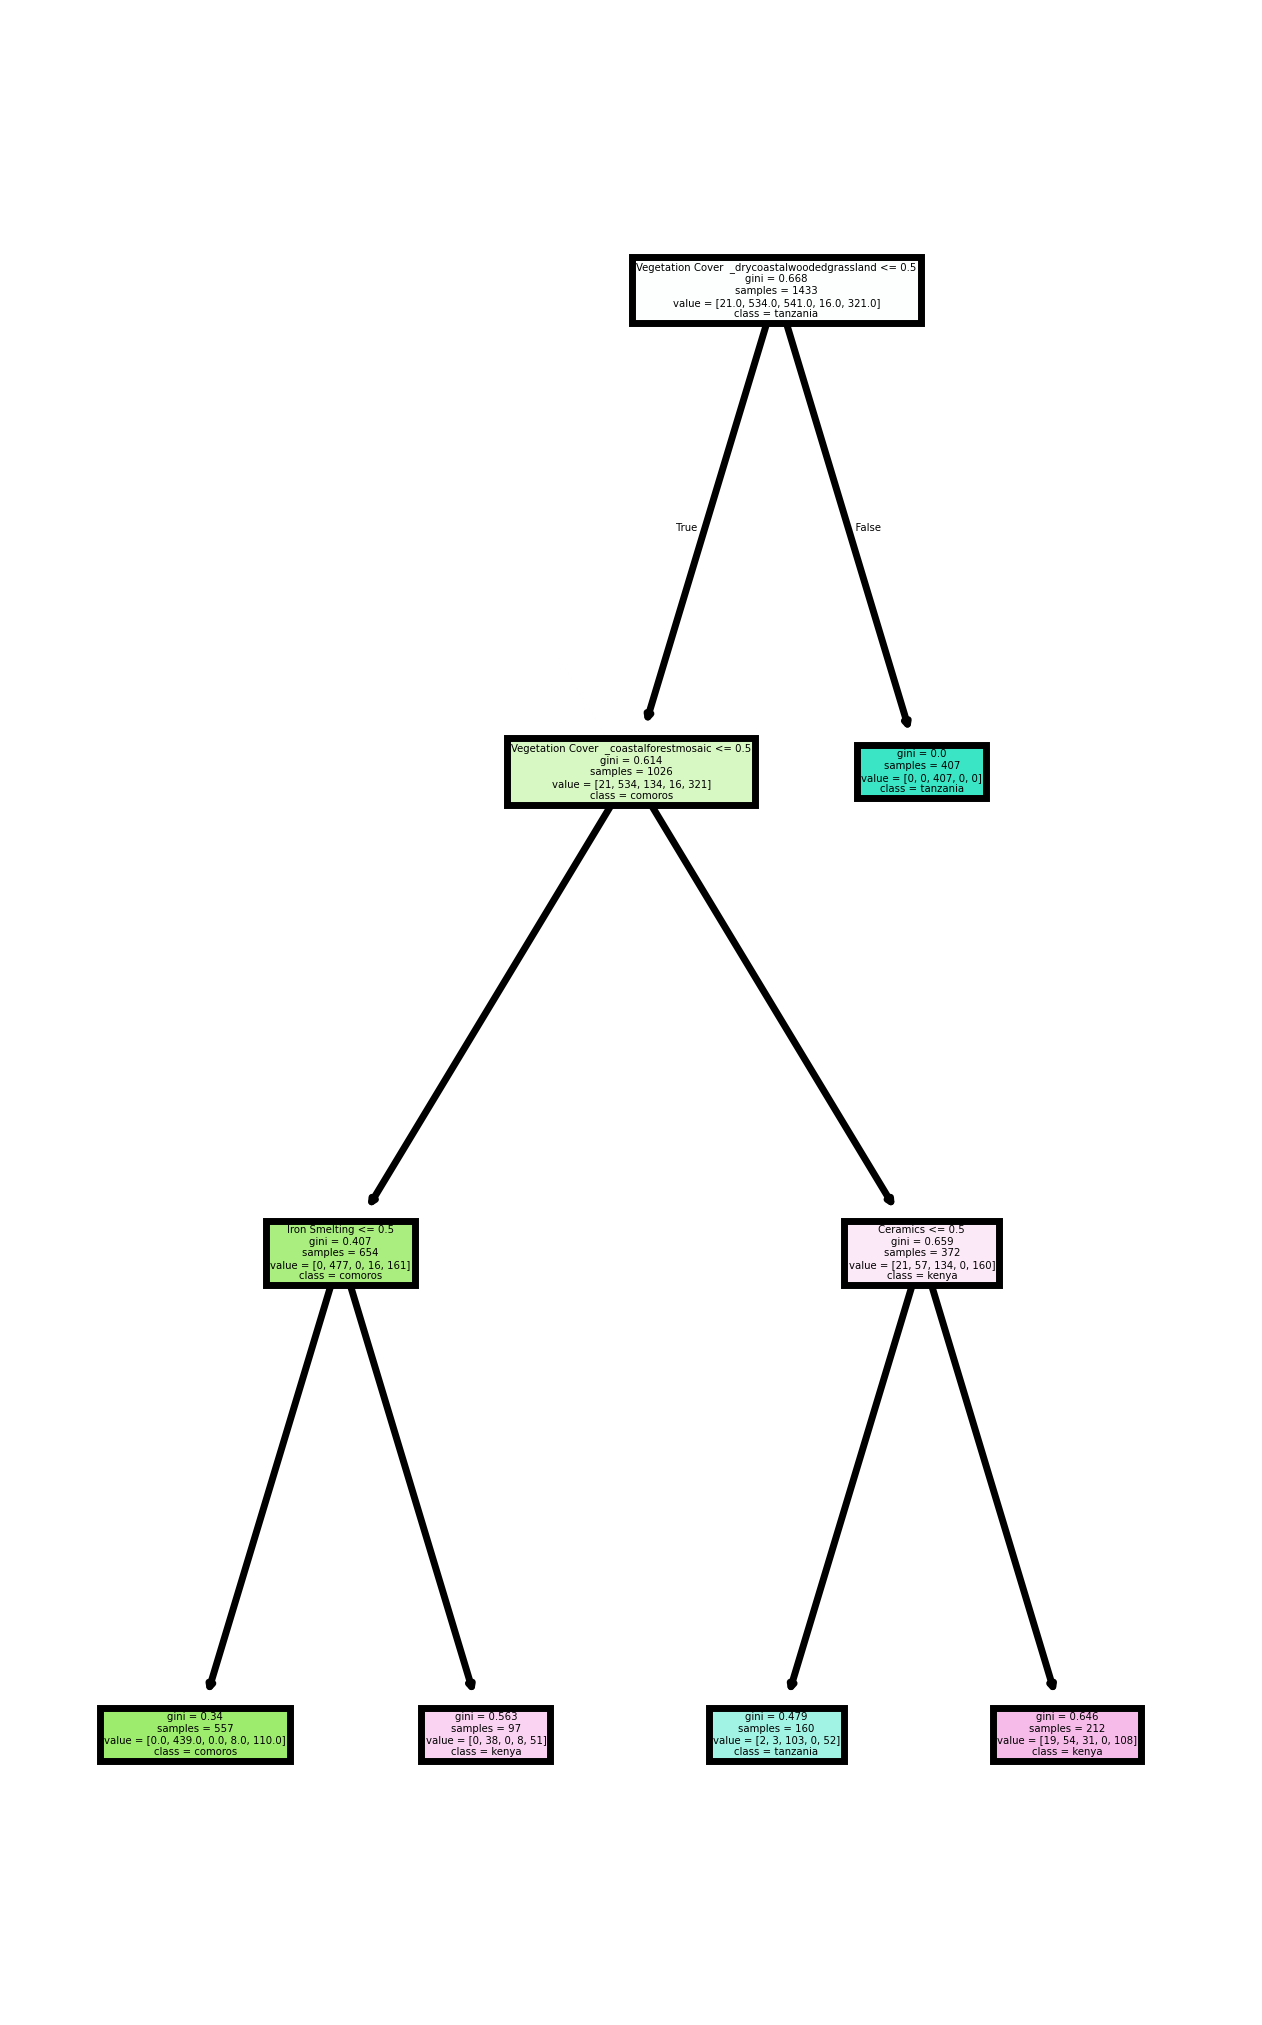

In [141]:
# Display decision tree
fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (3,5), dpi=500)
tree.plot_tree(dt_clf,
           feature_names = X.keys(), 
           class_names=list(set(y)),
           filled = True);

In [154]:
# import functions to do cross fold validation
from sklearn.model_selection import KFold, cross_val_score

In [221]:
# set up the classifier 
clf = DecisionTreeClassifier(max_depth=7)

# set the number of folds
k_folds = KFold(n_splits = 5, shuffle=True)

# calculate the scores
scores = cross_val_score(clf, X, y, cv = k_folds, )

# print the scores
print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Standard deviation: ", scores.std())

Cross Validation Scores:  [0.83286908 0.85236769 0.84636872 0.82402235 0.84078212]
Average CV Score:  0.8392819906319542
Standard deviation:  0.009976870173506227


In [222]:
K = range(1,20)
scores = []


for k in K:
    # Create Decision Tree classifier object
    dt_clf = DecisionTreeClassifier(max_depth=k)

    # Train Decision Tree Classifier on our data
    score = cross_val_score(clf, X, y, cv = k_folds).mean()
    scores.append(score)

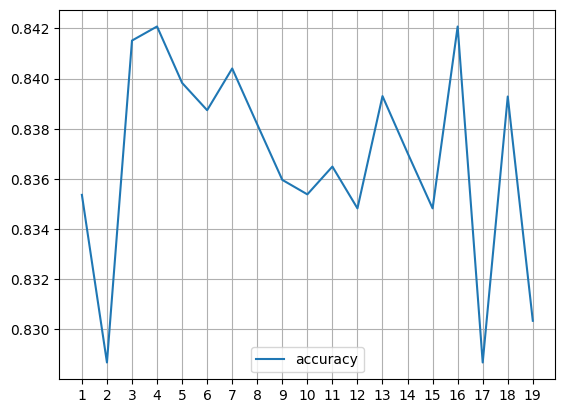

In [223]:
plt.plot(K, scores, label="accuracy")
plt.xticks(ticks=K)
plt.grid()
plt.legend()

## Random Forest

Now we've trained our first model using the Decision Tree algorithm, let's see how easy it is to try another algorithm, in this case a Random Forest. This is a so-called 'ensemble' learning method, meaning it makes a group (or ensemble) of classifiers, and then the predictions from all the classifiers are aggregated to find the most popular prediction. In this case, the Random Forest trains multiple different Decision Trees with some randomness, and then takes the most commonly predicted label of those Decision Trees. This kind of ensemble learning can be more accurate, and can combat bias and overfitting. So lets give this a shot:


In [ ]:
# Create the Random Forest classifier object
rf_clf = RandomForestClassifier(max_depth=2, random_state=0)

# Train the classifier
rf_clf.fit(X_train,y_train)

# Predict the labels on the test data
y_pred = rf_clf.predict(X_test)

# Show f1
print('F1 score on test data:')
print(f1_score(y_test, y_pred))

# use sklearn to view full classification report
print('Classification report:')
print(classification_report(y_test,y_pred))

That was pretty easy right? As the data was already loaded, we only needed 3 lines of code to train the algorithm. 

As you can see, the results are exactly the same as with the Decision Tree, this is to do with the small size of the data. This is evident from the 'support' column in the classification report, these numbers indicate how many samples were in the test set. So only 8 samples in total, that's not a lot!

Let's try another algorithm, and also look at the feature importance.

## Support Vector Machine

We'll use an SVM (Support Vector Machine), which is a very powerful, but relatively light-weight ML algorithm. 

In [ ]:
# create the machine learning classifier object
svm_clf = svm.SVC(kernel='linear') 

# train the classifier with our train data
svm_clf.fit(X_train, y_train)

# use the trained model to predict labels for our test set
y_pred = svm_clf.predict(X_test)

# use sklearn to calculate f1 score
print('F1 score on test data:')
print(f1_score(y_test, y_pred))

Again, we get the same F1 score.

Now let's visualise which features (columns) are most important for the SVM to make a decision on which label to predict. You don't need to understand exactly what's going on here, but basically we are making a DataFrame Series object from the SVM coefficients (the relative weight of each feature), taking the 10 largest feature weights, then plotting them as a bar chart ('barh').

In [ ]:
# visualise the most important features (columns) for the classifier
pd.Series(abs(svm_clf.coef_[0]), index=X.columns).nlargest(10).plot(kind='barh')


So it looks like 'has_loop' is the most important feature! The ML model tries to find which feature is the most different between classes, and uses that as the main feature. Now compare this with the ranked list of features you looked at with the decision tree, is the order the same?

Currently, we're only taking 4 columns as the features, let's train a model on all the features, and see if the feature importance changes:

In [ ]:
# set the X (the features we want the algorithm to learn from) to all columns except label
X = spearheads.drop('material', axis=1)

# use sklearn to automatically make a test/train set from our data, using a 80/20 split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# create the machine learning classifier object
svm_clf = svm.SVC(kernel='linear') 

# train the classifier with our train data
svm_clf.fit(X_train, y_train)

# use the trained model to predict labels for our test set
y_pred = svm_clf.predict(X_test)

# use sklearn to calculate f1 score
print('F1 score on test data:')
print(f1_score(y_test, y_pred))

Woah, the F1 score is 1, or 100% correct! This should almost always worry you, if this is the case, there is something going wrong, or something in your data is highly correlated. Let's look at the features again:

In [ ]:
# visualise the most important features (columns) for the classifier
pd.Series(abs(svm_clf.coef_[0]), index=X.columns).nlargest(10).plot(kind='barh')

Now we can see what's going on: it's using the date as the main feature, and when we look a the data, there is clear cut off point between 600 and 700 BC where they switched from bronze to iron. Of course, this leads to a perfect score, as the algorithm can just see if the date is above or below 650 and make the correct prediction every time. So let's remove the date, and while we're at it, also the spearhead number, as that's not information about the object:

In [ ]:
# set the X (the features we want the algorithm to learn from) to all columns except material, date and number
X = spearheads.drop(['material', 'date', 'number'], axis=1)

# use sklearn to automatically make a test/train set from our data, using a 80/20 split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# create the machine learning classifier object
svm_clf = svm.SVC(kernel='linear') 

# train the classifier with our train data
svm_clf.fit(X_train, y_train)

# use the trained model to predict labels for our test set
y_pred = svm_clf.predict(X_test)

# use sklearn to calculate f1 score
print('F1 score on test data:')
print(f1_score(y_test, y_pred))

# visualise the most important features (columns) for the classifier
pd.Series(abs(svm_clf.coef_[0]), index=X.columns).nlargest(10).plot(kind='barh')

That's looking a lot better, the F1 score is within a normal range again, and we can see that context, has_loop, and condition are the most important features.

We can also plot a so-called confusion matrix, which is technically a Seaborn heatmap. A confusion matrix shows for each category, how often the model has predicted the correct or incorrect category.

In [ ]:
# make confusion table
confusion = confusion_matrix(y_test,y_pred)
print(confusion)

# make heatmap
sns.heatmap(confusion)

# display the plot
plt.show()

When dealing with just 2 categories, this isn't very useful to see, but in the section below this will be more enlightening!

## Pottery exercise: predict shape class

Now let's see if you can train your own model from scratch, using the above code as an example! We'll use the pottery CSV, and we'll try to predict the shape_class of the pottery. This is normally done by experts looking at the pottery and making a judgement on which class the pottery is, but this is difficult to learn and requires a lot of practice. Let's see if ML can come to the rescue!

First, we'll load and prepare the data. You don't need to understand exactly what's going on here, but basically we are replacing strings with integers, and filling in empty cells in the dataframe, because SVM can't deal with strings and empty values. We also remove (drop) the vessel_id column, as that column is different for each pot, so it's not useful to include as a feature.

In [ ]:
# load  data
pottery = pd.read_csv('data/pottery.csv')

# replace string categories with ints, so models can use these columns
pottery['rim_orient'] = pd.factorize(pottery['rim_orient'])[0] + 1
pottery['additional_elem'] = pd.factorize(pottery['additional_elem'])[0] + 1

# fill missing values with zeroes
pottery = pottery.fillna(0)

# remove vessel_id column
pottery = pottery.drop('vessel_id', axis=1)

# show dataframe
pottery

Now it's your turn! Using the example code of the spearheads above, do the following:

- Set the labels to predict (`y`) as the shape_class column
- Set the features (`X`). You can choose to include all columns, or just the columns that you think are informative
- Create the test/train split
- Create the classifier object (choose SVM, Random Forest, Decision Tree, or another algorithm if you want to be brave!)
- Train the classifier on the train data
- Predict labels on the test data, using the trained model
- Print the classification_report
- Show the most important features in a bar chart
- Make a confusion matrix and display it as a heatmap

In [ ]:
# your code goes here:



Once you're satisfied with your model's performance, continue below.

## Cross validation

Up until now, we've trained and tested our models one 1 split of the data. But what if the test data, by chance, happens to be very similar to items in the train set? Or what if they are very dissimilar, and thus hard to predict? Then we might get results that are either lower or higher than how it would perform on average data. 

To counteract this, and get a better overall measure of the performance, we can use cross validation: making multiple test/train splits, training a model for each, and averaging the results.

Before you continue, make sure you have assigned the labels of the pottery CSV to the variable `y` (lowercase), and use all the other columns as features in variable `X` (uppercase).

In [ ]:
# import functions to do cross fold validation
from sklearn.model_selection import KFold, cross_val_score

In [ ]:
# set up the classifier 
clf = DecisionTreeClassifier(random_state=42)

# set the number of folds
k_folds = KFold(n_splits = 5)

# calculate the scores
scores = cross_val_score(clf, X, y, cv = k_folds)

# print the scores
print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Standard deviation: ", scores.std())

Ok great, we can see the scores for each fold, the average score, and the standard deviation. As you can see in the score list, the performance varies quite a lot! From 80% to 43%, that's a massive difference between folds. Imagine if you thought your model wasn't working, just because you selected fold 5 as the test set?

Now play around with the above cell and change the number of folds, try some large numbers and some low numbers. What do you notice? And why do you think that is?

Now again update the above cell and change the classifier type. Do certain classifiers perform better, and/or more consistently (lower standard deviation)? Why do you think that is?

## Extra: Neural Networks

Still have time left over? Try setting up your first neural network! This is a bit of a challenge compared the level of the rest of this exercise. Go to https://scikit-learn.org/stable/modules/neural_networks_supervised.html and try to follow the instructions, but use the pottery data. Print out the F1 score for your model and see what you get.

You might run into errors, try and solve these by reading the error and following the instructions, or googling the solution.

In [ ]:
# your code goes here


What did you find? Did this neural network perform better or worse? Why do you think that is?

## End

That's all we got for this exercise, go enjoy a tea or coffee, you've earned it!